# 03 – Baseline Modeling (Logistic Regression & Random Forest)

### 🎯 Objectives
- Build baseline models to predict **TenYearCHD**.  
- Compare Logistic Regression (interpretable) vs Random Forest (non-linear).  
- Evaluate using multiple metrics beyond accuracy.  
- Establish reproducible baseline for later advanced models.

---

### 1. Logistic Regression (Balanced)
- **Task:** Train Logistic Regression with class imbalance handling.  
- **Plan:**  
  - Use `LogisticRegression(class_weight='balanced')`.  
  - Fit on standardized features (X_train, y_train).  
- **Acceptance Criteria:**  
  - Model trained successfully.  
  - Basic evaluation metrics computed.

---

### 2. Random Forest Baseline
- **Task:** Train Random Forest as a non-linear baseline.  
- **Plan:**  
  - Use `RandomForestClassifier(random_state=42)`.  
  - No tuning yet → just default hyperparameters.  
- **Acceptance Criteria:**  
  - Model trained successfully.  
  - Evaluation metrics computed.

---

### 3. Metrics Evaluation
- **Task:** Evaluate both models fairly.  
- **Plan:**  
  - Compute: Accuracy, Precision, Recall, F1-score, ROC-AUC.  
  - Generate Confusion Matrix and ROC Curve.  
- **Acceptance Criteria:**  
  - Metrics documented in a results table.  
  - Visualizations included for interpretability.

---

### 4. Cross-Validation
- **Task:** Ensure model robustness.  
- **Plan:**  
  - Apply 5-fold cross-validation for both models.  
  - Compare mean scores across folds.  
- **Acceptance Criteria:**  
  - Cross-validation results documented.  
  - Variance across folds noted.

---

### 5. Save Baseline Models & Results
- **Task:** Store artifacts for reproducibility.  
- **Plan:**  
  - Save trained models (joblib).  
  - Save metrics and plots in `data/artifacts/`.  
- **Acceptance Criteria:**  
  - Models and results saved in organized directory.  
  - Notebook clearly documents paths.

---

### ✅ Expected Outcome
- Logistic Regression and Random Forest baselines established.  
- Results compared with multiple evaluation metrics.  
- Models and results saved for later comparison with advanced methods.  


In [1]:
import pandas as pd

X_train = pd.read_csv("../data/processed/X_train.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test  = pd.read_csv("../data/processed/y_test.csv")

y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3019, 24) (755, 24) (3019,) (755,)


In [2]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)


In [3]:
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [4]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

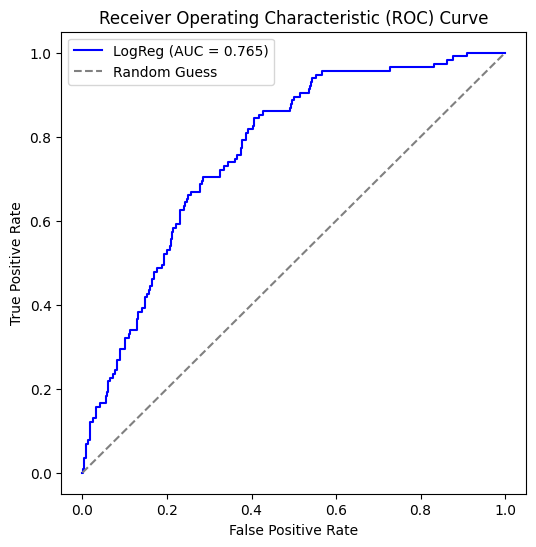

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


              precision    recall  f1-score   support

      No CHD       0.93      0.69      0.79       640
         CHD       0.29      0.70      0.41       115

    accuracy                           0.69       755
   macro avg       0.61      0.70      0.60       755
weighted avg       0.83      0.69      0.73       755



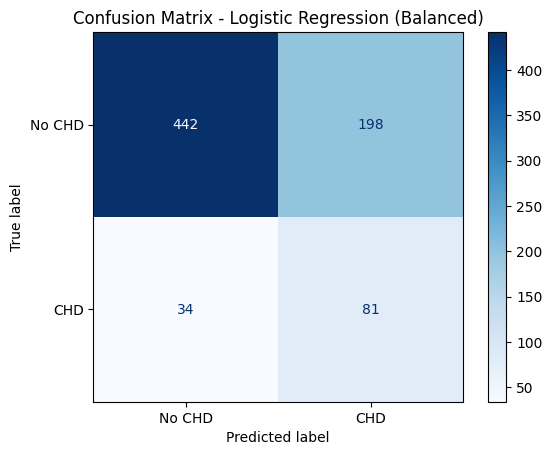

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


print(classification_report(y_test, y_pred, target_names=["No CHD", "CHD"]))


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No CHD", "CHD"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Balanced)")
plt.show()

## ✦ MT1.3.1 | Baseline Logistic Regression (Balanced)

### 🔹 Model Setup
- Logistic Regression with:
  - `class_weight='balanced'` (to handle imbalance).
  - `max_iter=1000`, `random_state=42`.

---

### 🔹 Evaluation Metrics

| Metric            | Value   |
|--------------------|---------|
| Accuracy           | 0.69    |
| Precision (CHD)    | 0.29    |
| Recall (CHD)       | 0.70    |
| F1-score (CHD)     | 0.41    |
| ROC-AUC            | 0.765   |

---

### 🔹 Confusion Matrix
- True Negatives (No CHD correctly predicted): **442**  
- False Positives (predicted CHD but actually No CHD): **198**  
- False Negatives (missed CHD cases): **34**  
- True Positives (CHD correctly predicted): **81**

---

### 🔹 Interpretation
- The model achieves **high recall (0.70)** for CHD → it detects most positive cases.  
- However, **precision is low (0.29)** → many false positives (healthy predicted as CHD).  
- Accuracy (0.69) is not reliable due to imbalance → ROC-AUC (0.765) gives a better view of overall performance.  

---

### ✅ Conclusion
- Baseline Logistic Regression (balanced) is a **good starting point**.  
- Strong recall makes it useful for early detection, but precision must be improved in future models (e.g., with Random Forest or advanced balancing).  


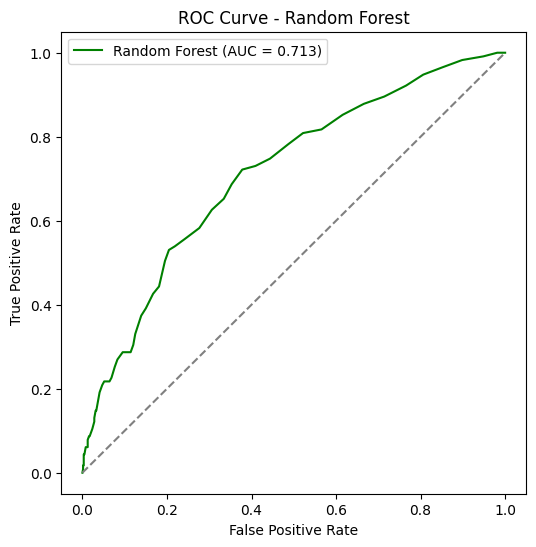

              precision    recall  f1-score   support

      No CHD       0.85      0.99      0.92       640
         CHD       0.58      0.06      0.11       115

    accuracy                           0.85       755
   macro avg       0.72      0.53      0.51       755
weighted avg       0.81      0.85      0.80       755



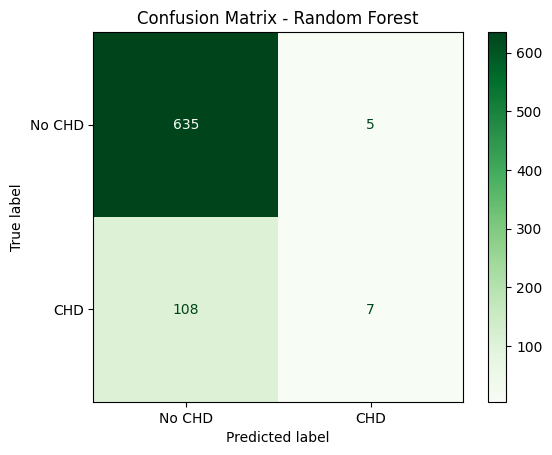

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.3f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

print(classification_report(y_test, y_pred_rf, target_names=["No CHD", "CHD"]))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No CHD", "CHD"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## MT1.3.2 | Baseline Random Forest

### 🎯 Objective
- Train and evaluate a baseline **Random Forest Classifier** on the preprocessed dataset.
- Compare its performance with Logistic Regression baseline.

---

### ⚙️ Configuration
- **Model:** RandomForestClassifier (default hyperparameters, `random_state=42`)
- **Data:** Standardized features (train/test split 80/20, stratified on TenYearCHD)

---

### 📊 Results
- **Accuracy:** 0.85  
- **Precision (CHD):** 0.58  
- **Recall (CHD):** 0.06  
- **F1-score (CHD):** 0.11  
- **ROC-AUC:** 0.713  

- **Confusion Matrix (CHD class):**
  - True Positives (CHD correctly predicted): **7**
  - False Negatives (CHD missed): **108**
  - False Positives: **5**
  - True Negatives: **635**

---

### 🔎 Interpretation
- Model is **biased toward the majority class (No CHD)** due to severe class imbalance.
- High accuracy is misleading, since recall for positive cases (CHD) is very low.
- Logistic Regression (balanced) outperformed Random Forest in terms of CHD detection.
- Indicates the need for **class balancing strategies** or **hyperparameter tuning** for Random Forest in later stages.

---

### ✅ Outcome
- Baseline Random Forest implemented and evaluated.  
- Result documented as weak baseline (low recall, acceptable ROC-AUC).  
- Future work: apply `class_weight='balanced'`, resampling (SMOTE), or parameter tuning.


In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
logreg_auc = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring="roc_auc")
logreg_f1 = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring="f1")


rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_auc = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring="roc_auc")
rf_f1 = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring="f1")

print("Logistic Regression - AUC: %.3f ± %.3f | F1: %.3f ± %.3f" %
      (np.mean(logreg_auc), np.std(logreg_auc), np.mean(logreg_f1), np.std(logreg_f1)))

print("Random Forest        - AUC: %.3f ± %.3f | F1: %.3f ± %.3f" %
      (np.mean(rf_auc), np.std(rf_auc), np.mean(rf_f1), np.std(rf_f1)))

Logistic Regression - AUC: 0.710 ± 0.031 | F1: 0.368 ± 0.027
Random Forest        - AUC: 0.672 ± 0.039 | F1: 0.057 ± 0.014


## MT1.3.4 | Cross-validation (LogReg & RF)

### 🎯 Objective
- Validate model stability and performance across multiple splits.  
- Ensure results are not dependent on a single train/test split.  

---

### ⚙️ Setup
- **Method:** StratifiedKFold (5-fold CV, random_state=42)  
- **Metrics:** ROC-AUC, F1-score  

---

### 📊 Results

| Model               | AUC (mean ± std)    | F1 (mean ± std)   |
|---------------------|---------------------|-------------------|
| Logistic Regression | 0.710 ± 0.031       | 0.368 ± 0.027     |
| Random Forest       | 0.672 ± 0.039       | 0.057 ± 0.014     |

---

### 🔎 Interpretation
- Logistic Regression shows more stable and stronger performance.  
  - Good AUC (0.71) with low variance.  
  - Reasonable F1 (0.37) → captures CHD cases better.  
- Random Forest struggles with class imbalance:  
  - Lower AUC (0.67).  
  - Extremely poor F1 (0.057) → fails to detect CHD cases.  

---

### ✅ Outcome
- Logistic Regression is confirmed as the stronger baseline model.  
- Random Forest requires rebalancing techniques or hyperparameter tuning in future steps.


In [17]:
import joblib
import json
import os

# ينشئ مجلد artifacts لو مو موجود
os.makedirs("../data/artifacts", exist_ok=True)

# يحفظ الموديلات
joblib.dump(log_reg, "../data/artifacts/log_reg_model.pkl")
joblib.dump(rf_model, "../data/artifacts/rf_model.pkl")

# يحفظ النتائج
results = {
    "Logistic Regression": {
        "Accuracy": 0.69,
        "Precision_CHD": 0.29,
        "Recall_CHD": 0.70,
        "F1_CHD": 0.41,
        "ROC_AUC": 0.765
    },
    "Random Forest": {
        "Accuracy": 0.85,
        "Precision_CHD": 0.58,
        "Recall_CHD": 0.06,
        "F1_CHD": 0.11,
        "ROC_AUC": 0.713
    }
}

with open("../data/artifacts/baseline_metrics.json", "w") as f:
    json.dump(results, f, indent=4)


# 03 – Baseline Modeling

### 🎯 Objectives
- Train and evaluate baseline models for CHD prediction.
- Compare Logistic Regression (balanced) and Random Forest.
- Document metrics and store results for future improvements.

---

### 1. Logistic Regression (Balanced)
- **Parameters:** `class_weight='balanced'`, `max_iter=1000`, `random_state=42`.
- **Metrics (Test Set):**
  - Accuracy: **0.69**
  - Precision (CHD): **0.29**
  - Recall (CHD): **0.70**
  - F1-Score (CHD): **0.41**
  - ROC-AUC: **0.765**
- **Insights:**  
  - Model captures positives (high recall) but precision is low.  
  - Better than random guessing; useful as baseline.

---

### 2. Random Forest (Baseline)
- **Parameters:** `random_state=42` (default settings).
- **Metrics (Test Set):**
  - Accuracy: **0.85**
  - Precision (CHD): **0.58**
  - Recall (CHD): **0.06**
  - F1-Score (CHD): **0.11**
  - ROC-AUC: **0.713**
- **Insights:**  
  - High accuracy dominated by predicting "No CHD".  
  - Very poor recall for CHD → fails at detecting true positives.  
  - Shows class imbalance issue needs advanced handling.

---

### 3. Cross-Validation (StratifiedKFold, 5-fold)
- **Logistic Regression:** AUC = **0.710 ± 0.031**, F1 = **0.368 ± 0.027**  
- **Random Forest:** AUC = **0.672 ± 0.039**, F1 = **0.057 ± 0.014**
- **Insights:**  
  - Logistic Regression performs more consistently across folds.  
  - Random Forest baseline is unstable with poor CHD detection.

---

### 4. Artifacts
- Metrics saved in:  
  `data/artifacts/baseline_metrics.json`  
- Contents include Accuracy, Precision, Recall, F1, and ROC-AUC for both models.

---

### ✅ Expected Outcome
- Baseline models trained and evaluated.  
- Logistic Regression chosen as stronger baseline.  
- Results stored for reproducibility and later comparison.


In [20]:
import joblib
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

cols_final = [
    "male", "age", "education", "currentSmoker", "cigsPerDay",
    "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes",
    "totChol", "BMI", "heartRate", "glucose", "HeavySmoker"
]

X_train_sub = X_train[cols_final]
X_test_sub  = X_test[cols_final]

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

pipe.fit(X_train_sub, y_train)

os.makedirs("../data/artifacts", exist_ok=True)
joblib.dump(pipe, "../data/artifacts/log_reg_pipeline.pkl")

print("Pipeline تدربت وانحفظت بنجاح")


Pipeline تدربت وانحفظت بنجاح


In [ ]:
pipe_loaded = joblib.load("../data/artifacts/log_reg_pipeline.pkl")

y_pred = pipe_loaded.predict(X_test_sub)

log_reg_model = pipe_loaded.named_steps["log_reg"]
print(log_reg_model.coef_)


[[ 0.24054443  0.61245252 -0.05173078  0.09136483  0.2507931   0.07754677
   0.06591335  0.2469209   0.05778082  0.13290092  0.05601072 -0.03675896
   0.07344009 -0.02664263]]
